In [36]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 9.0 MB/s eta 0:00:00


In [1]:
import pickle

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
lab1_dataset = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Lab01_Dataset.xlsx")

In [4]:
lab1_dataset

,CarModel,AgeOfCar,Price,OdoMeterReading,Unnamed: 4,DealingType,GearSystem,NoOfOwners
0,Ford Figo Aspire 1.5 TDCi Trend,8,574998.75,152620,Diesel,Broker,Manual,First Owner
1,Mahindra Scorpio SLE BSIV,11,656250.00,149000,Diesel,Direct Owner,Manual,First Owner
2,Tata Manza Club Class Quadrajet90 LS,9,250000.00,104000,Diesel,Direct Owner,Manual,First Owner
3,Toyota Corolla Altis 1.8 VL AT,13,437500.00,84000,Petrol,Direct Owner,Automatic,Third Owner
4,Tata Indigo CS eLS BS IV,12,225000.00,124000,Diesel,Direct Owner,Manual,First Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai EON Era,9,362500.00,16000,Petrol,Broker,Manual,First Owner
4336,Hyundai Grand i10 1.2 Kappa Asta,6,625000.00,54000,Petrol,Direct Owner,Manual,First Owner
4337,Maruti Ritz LXi,7,343750.00,164000,Petrol,Direct Owner,Manual,First Owner
4338,Honda Amaze VX Diesel BSIV,5,975000.00,36114,Diesel,Broker,Manual,First Owner


In [5]:
lab1_dataset.describe()

,AgeOfCar,Price,OdoMeterReading
count,4340.000000,4.340000e+03,4340.000000
mean,9.909217,6.301591e+05,70215.777419
std,4.215344,7.231859e+05,46644.102194
min,3.000000,2.500000e+04,4001.000000
25%,7.000000,2.609372e+05,39000.000000
50%,9.000000,4.375000e+05,64000.000000
75%,12.000000,7.500000e+05,94000.000000
max,31.000000,1.112500e+07,810599.000000


In [6]:
lab1_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CarModel         4340 non-null   object 
 1   AgeOfCar         4340 non-null   int64  
 2   Price            4340 non-null   float64
 3   OdoMeterReading  4340 non-null   int64  
 4   Unnamed: 4       4340 non-null   object 
 5   DealingType      4340 non-null   object 
 6   GearSystem       4340 non-null   object 
 7   NoOfOwners       4340 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 271.4+ KB


In [7]:
lab1_dataset.corr()

,AgeOfCar,Price,OdoMeterReading
AgeOfCar,1.000000,-0.413922,0.419688
Price,-0.413922,1.000000,-0.192289
OdoMeterReading,0.419688,-0.192289,1.000000


In [8]:
lab1_dataset.nunique()

CarModel           1491
AgeOfCar             27
Price               445
OdoMeterReading     770
Unnamed: 4            5
DealingType           3
GearSystem            2
NoOfOwners            5
dtype: int64

In [9]:
lab1_dataset.isnull().sum()

CarModel           0
AgeOfCar           0
Price              0
OdoMeterReading    0
Unnamed: 4         0
DealingType        0
GearSystem         0
NoOfOwners         0
dtype: int64

## About the data:
Data is about cars in which it contains fuel type, age of car, price at which it was sold, dealer type, gear system, no. of owners and distance travelled by the car.

- there are no null values.
- There are four numerical columns and four categorical columns
- Only two column contain data which is useful for evaluation
- Statitical values related to the numerical values in the dataset
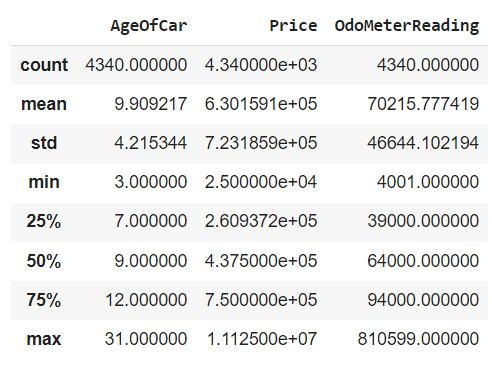


In [10]:
lab1_dataset.rename(columns = {'Unnamed: 4':'Fuel Type'}, inplace = True)

In [11]:
duplicate=lab1_dataset.duplicated()

In [12]:
lab1_dataset[duplicate]

,CarModel,AgeOfCar,Price,OdoMeterReading,Fuel Type,DealingType,GearSystem,NoOfOwners
190,Audi A6 2.0 TDI Premium Plus,10,1625000.0,62500,Diesel,Broker,Automatic,First Owner
231,Hyundai Verna CRDi 1.6 AT EX,5,1375000.0,29000,Diesel,Direct Owner,Automatic,Second Owner
275,Nissan Micra Active XV S,10,205000.0,34000,Petrol,Direct Owner,Manual,First Owner
305,Renault Duster 85PS Diesel RxL,10,562500.0,5000,Diesel,Broker,Manual,Second Owner
342,Maruti Ertiga VXI,8,781250.0,15918,Petrol,Trustmark Broker,Manual,First Owner
...,...,...,...,...,...,...,...,...
4326,Hyundai EON Era Plus,10,200000.0,84000,Petrol,Direct Owner,Manual,First Owner
4327,Mahindra Bolero 2011-2019 SLE,10,406250.0,66200,Diesel,Broker,Manual,First Owner
4328,Renault Lodgy Stepway 85PS RXZ 8S,6,812500.0,44000,Diesel,Direct Owner,Manual,First Owner
4330,Skoda Laura Ambiente 2.0 TDI CR MT,11,481250.0,56000,Diesel,Broker,Manual,First Owner


In [13]:
#----------------------------------------

## Statistical analysis

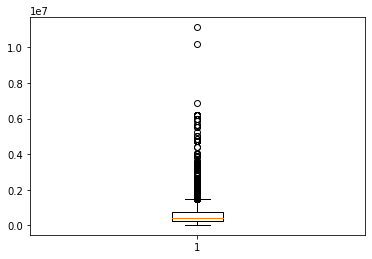

In [14]:
plt.boxplot(lab1_dataset.iloc[:,2]); # Price

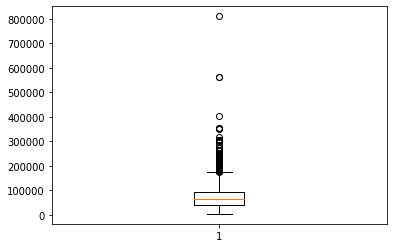

In [15]:
plt.boxplot(lab1_dataset.iloc[:,3]); # OdoMeterReading

In [16]:

# IQR (inter quartile range) 
Q1 = np.percentile(lab1_dataset['Price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(lab1_dataset['Price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", lab1_dataset.shape)
 
# Upper bound
upper = np.where(lab1_dataset['Price'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(lab1_dataset['Price'] <= (Q1-1.5*IQR))
 
lab1_dataset.drop(upper[0], inplace = True)
lab1_dataset.drop(lower[0], inplace = True)
 
print("New Shape: ", lab1_dataset.shape)

Old Shape:  (4340, 8)
New Shape:  (4069, 8)


<ipython-input-16-d894067402c9>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(lab1_dataset['Price'], 25,
<ipython-input-16-d894067402c9>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(lab1_dataset['Price'], 75,


In [17]:
lab1_dataset.drop_duplicates(keep='last',inplace=True)
lab1_dataset

,CarModel,AgeOfCar,Price,OdoMeterReading,Fuel Type,DealingType,GearSystem,NoOfOwners
0,Ford Figo Aspire 1.5 TDCi Trend,8,574998.75,152620,Diesel,Broker,Manual,First Owner
1,Mahindra Scorpio SLE BSIV,11,656250.00,149000,Diesel,Direct Owner,Manual,First Owner
4,Tata Indigo CS eLS BS IV,12,225000.00,124000,Diesel,Direct Owner,Manual,First Owner
5,Skoda Octavia Classic 1.9 TDI MT,19,150000.00,124000,Diesel,Direct Owner,Manual,Second Owner
7,Hyundai Getz 1.5 CRDi GVS,15,293750.00,64208,Diesel,Broker,Manual,First Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai EON Era,9,362500.00,16000,Petrol,Broker,Manual,First Owner
4336,Hyundai Grand i10 1.2 Kappa Asta,6,625000.00,54000,Petrol,Direct Owner,Manual,First Owner
4337,Maruti Ritz LXi,7,343750.00,164000,Petrol,Direct Owner,Manual,First Owner
4338,Honda Amaze VX Diesel BSIV,5,975000.00,36114,Diesel,Broker,Manual,First Owner


In [18]:
lab1_dataset['Fuel Type'].unique()

array(['Diesel', 'Petrol', 'CNG', 'Electric', 'LPG'], dtype=object)

In [19]:
grouped = lab1_dataset.groupby(lab1_dataset["Fuel Type"])
df1 = grouped.get_group('Diesel')
df2 = grouped.get_group('Petrol')
df3 = grouped.get_group('CNG')
df4 = grouped.get_group('Electric')
df5 = grouped.get_group('LPG')

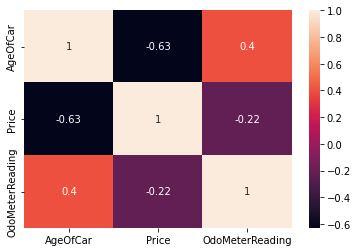

In [20]:
sns.heatmap(lab1_dataset.corr(),annot=True)

In [21]:
#--------------------------------------

## Encoding and normalization

In [22]:
lab1_dataset['Fuel Type'].to_numpy().reshape(-1,1)

array([['Diesel'],
       ['Diesel'],
       ['Diesel'],
       ...,
       ['Petrol'],
       ['Diesel'],
       ['Petrol']], dtype=object)

In [40]:
## One Hot encoding 
## Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

encoded_df = lab1_dataset.copy()

enc = OrdinalEncoder()
oneHot_encoded_data = lab1_dataset.copy()


ohe_fueltype = OneHotEncoder(handle_unknown='ignore')
ohe_fueltype.fit(lab1_dataset[['Fuel Type']])
#pickle.dump(ohe_fueltype, open("ohe_fueltype.pickle", 'wb'))

ohe_DealingType = OneHotEncoder(handle_unknown='ignore')
ohe_DealingType.fit(lab1_dataset[['DealingType']])
#pickle.dump(ohe_DealingType, open("ohe_DealingType.pickle", 'wb'))

ohe_GearSystem = OneHotEncoder(handle_unknown='ignore')
ohe_GearSystem.fit(lab1_dataset[['GearSystem']])
#pickle.dump(ohe_GearSystem, open("ohe_GearSystem.pickle", 'wb'))

ohe_NOO = OneHotEncoder(handle_unknown='ignore')
ohe_NOO.fit(lab1_dataset[['NoOfOwners']])

OneHotEncoder(handle_unknown='ignore')

In [41]:
lab1_dataset['Fuel Type'].unique()

array(['Diesel', 'Petrol', 'CNG', 'Electric', 'LPG'], dtype=object)

In [46]:
encoded_df = pd.DataFrame(ohe_fueltype.transform(lab1_dataset[['Fuel Type']]))
encoded_df = encoded_df.join(ohe_GearSystem.transform(lab1_dataset[['GearSystem']]).toarray())
encoded_df = encoded_df.join(ohe_DealingType.transform(lab1_dataset[['DealingType']]).toarray())
encoded_df = encoded_df.join(ohe_NOO.transform(lab1_dataset[['NoOfOwners']]))

AttributeError: ignored

In [ ]:
encoded_df

In [39]:
from category_encoders import *
maplist = ['Test Drive Car','First Owner','Second Owner','Third Owner','Fourth & Above Owner']
enc = OrdinalEncoder(cols=maplist).fit(lab1_dataset[['NoOfOwners']])
enc.category_mapping[0]['mapping']


ValueError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_age = MinMaxScaler()
encoded_df = encoded_df.join(scaler_age.fit_transform(lab1_dataset[['AgeOfCar']]),columns=['AgeOfCar'])
scaler_p = MinMaxScaler()
encoded_df = encoded_df.join(scaler_p.fit_transform(lab1_dataset[['Price']]),columns=['Price'])
scaler_o = MinMaxScaler()
encoded_df = encoded_df.join(scaler_o.fit_transform(lab1_dataset[['OdoMeterReading']]),columns=['OdoMeterReading'])

#pickle.dump(scaler_p, open("scaled_Price.pickle", 'wb'))
#pickle.dump(scaler_o, open("scaled_OdoMeterReading.pickle", 'wb'))

In [ ]:
#pickle.dump(ohe,open('OneHotEncoder','wb'))
#pickle.dump(enc,open('OrdinalEncoder.pickle','wb'))

In [ ]:
encoded_df


In [ ]:
df

In [ ]:
import matplotlib.pyplot as plt

plt.hist(label_encoded_data.iloc[:,2], bins=25, density=True, alpha=0.6)
plt.show()

In [ ]:
#-----------------------------------------------------------------

## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

dataset=dataset.drop('CarModel',axis='columns')

y = dataset['Price']
X = dataset.drop('Price',axis='columns')
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25)

regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

In [ ]:
from sklearn.linear_model import LinearRegression as lm
import matplotlib.pyplot as plt

model=lm().fit(X_train,y_train)
y_pred=model.predict(X_test)

plt.scatter(y_test,y_pred)
a,b = np.polyfit(y_test,y_pred, 1)
plt.plot(y_test, a*y_test+b,color='purple') 

In [ ]:
from sklearn.metrics import r2_score

r2=r2_score(y_test,y_pred)
r2

In [ ]:
from sklearn.linear_model import LinearRegression as lm
import matplotlib.pyplot as plt

model=lm().fit(X_train1,y_train1)
y_pred2=model.predict(X_test1)

plt.scatter(y_test1,y_pred2)
a,b = np.polyfit(y_test1,y_pred2, 1)
plt.plot(y_test1, a*y_test1+b,color='purple') 

In [ ]:
from sklearn.metrics import r2_score

r2=r2_score(y_test1,y_pred2)
r2

In [ ]:
#------------------------------------

##Graphs

In [ ]:
# For predicting price of the car, which variables are useful?
import seaborn as sns
corr = X_train.corr()
#mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
sns.heatmap(dataset.corr(),annot=True);

Inference : price of the car is inversely proportinal to age of the car (-0.63) <br>
Other varianle are not significantly related to price so we can't predict price just by these variables

In [ ]:
# Does age of car and price have a significant relation while dividing the data according to gear system?
g = sns.catplot(x="Price", y="AgeOfCar",hue='GearSystem',data=lab1_dataset)


Inference : most of the people sold manual cars rather than automatic cars<br>
This show the trend of the car purchase done by the people in recent years<br>
People also sold there newly bought vehicles for Automatic vehicles (speculation)

In [ ]:
# how people prefer to sell there car according to the age of the car?
g = sns.catplot(x="AgeOfCar", col="DealingType", col_wrap=4,
                data=lab1_dataset[lab1_dataset.notnull()],
                kind="count", height=5, aspect=1)

Inference : Car's age matter while selling <br>
Not many people want to buy cars from trustmark broker and broker.<br>
People don't buy old cars from brokers as they may be to broken to be sold.





In [ ]:
# How is price and OdoMeter Reading correlated?
plt.title('Price vs. OdoMeter Reading')
plt.xlabel('Price')
plt.ylabel('OdoMeter Reading')
plt.scatter(lab1_dataset['Price'],lab1_dataset['OdoMeterReading']);

Inference : price of car is moderately related to the odometer reading of the car.<br>
We can't decide if the car is good or bad based on the distance the car has travelled.<br>
Cars who have travelled less distance were sold at a higher rate

In [ ]:
# Is the data in normal distribution? -- price
plt.title('Price distribution in the data')
plt.xlabel('Price')
plt.plot(dataset.iloc[0:30,2])

Inference : the data is not normally distributed<br>
Can't get any inference because either data is too small or contains less data.

In [ ]:
# How does fuel type of the car changes as age changes?
plt.bar(lab1_dataset['Fuel Type'], lab1_dataset['AgeOfCar'], color ='maroon',
        width = 0.4)

Inference : People sell cars with petrol fuel type and older cars more <br>
Reason can be as petrol / fossil fuel prices are increasing or polution<br>
People are moving towards CNG and electric cars as the fuel is cheaper and maintenance cost is less 

In [ ]:
#-----------------------------------------------

In [ ]:
with pd.ExcelWriter("Processed Dataset.xlsx") as writer:
    
  lab1_dataset.to_excel(writer, sheet_name="Cleaned", index=False)
  dataset2.to_excel(writer, sheet_name="One hot encoded", index=False)